<a href="https://colab.research.google.com/github/alanabates/EDA-and-Predictive-Analytics-in-Python/blob/main/HW2_Bates_Alana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DESC 624 - Logistic Regression and Random Forest**

HW #2

#**I. Python Setup Section**

In [ ]:
#Python Packages
import pandas as pd
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import seaborn as sn
import numpy as np
from scipy import stats

In [ ]:
#Install python datatable which is the same as data.table() in R
!pip install datatable
import datatable as dt

from datatable import (dt, f, by, ifelse, update, sort,
                       count, min, max, mean, sum, rowsum)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Python h2o - the Machine Learning package we will be using.

! pip install h2o

import h2o

#h2o.init()
#h2o.shutdown()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#**II. Python Data Loading**

In [ ]:
#Loading Data in Python
bank_p = dt.fread("https://raw.githubusercontent.com/jjghockey/DESC624/main/bank-full.csv")
print(bank_p.head())
print(bank_p.shape)


   |   age  job           marital   education  default  balance  housing  loan   contact    day  …  campaign  pdays  previous  poutcome  y    
   | int32  str32         str32     str32      str32      int32  str32    str32  str32    int32        int32  int32     int32  str32     str32
-- + -----  ------------  --------  ---------  -------  -------  -------  -----  -------  -----     --------  -----  --------  --------  -----
 0 |    58  management    married   tertiary   no          2143  yes      no     unknown      5  …         1     -1         0  unknown   no   
 1 |    44  technician    single    secondary  no            29  yes      no     unknown      5  …         1     -1         0  unknown   no   
 2 |    33  entrepreneur  married   secondary  no             2  yes      yes    unknown      5  …         1     -1         0  unknown   no   
 3 |    47  blue-collar   married   unknown    no          1506  yes      no     unknown      5  …         1     -1         0  unknown   no   

#**III. Python Data Exploration**

Pythons function for summary() only uses numeric values, so you will have to build categorical tables on your own.

In [ ]:
bank_p.names

('age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y')

Categorical tables using python

In [ ]:
bank_p['count'] = 1  #Build a new variable in order to count rows in the data
bank_p[f.y=="yes",'y1']=1
bank_p[f.y=="no",'y1']=0

bank_p[:, sum(f.count), by('y', 'y1')]  #Recode y into a 0/1 dummy variable for classification later.

,y,y1,count
,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪
0,no,0,39922
1,yes,1,5289


In [ ]:
bank_pd=bank_p.to_pandas()
summary = bank_pd.describe()
summary = summary.transpose()
summary

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0
count,45211.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
y1,45211.0,0.116985,0.321406,0.0,0.0,0.0,0.0,1.0


In [ ]:
bank_pd.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,count,y1
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1,0


In [ ]:
bank_p[:, sum(f.count), by('marital') ]  #Summary table of Marital Status

,marital,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,divorced,5207
1,married,27214
2,single,12790


In [ ]:
bank_p[:, sum(f.count), by('job') ] #Summary table of education 

,job,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,admin.,5171
1,blue-collar,9732
2,entrepreneur,1487
3,housemaid,1240
4,management,9458
5,retired,2264
6,self-employed,1579
7,services,4154
8,student,938


In [ ]:
bank_p[:, sum(f.count), by('education') ] #Summary table of education 

,education,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,primary,6851
1,secondary,23202
2,tertiary,13301
3,unknown,1857


In [ ]:
bank_p[:, sum(f.count), by('default') ] #Summary table of default

,default,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,no,44396
1,yes,815


In [ ]:
bank_p[:, sum(f.count), by('housing') ] #Summary table of housing

,housing,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,no,20081
1,yes,25130


In [ ]:
bank_p[:, sum(f.count), by('loan') ] #Summary table of loan

,loan,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,no,37967
1,yes,7244


In [ ]:
bank_p[:, sum(f.count), by('contact') ] #Summary table of contact 

,contact,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,cellular,29285
1,telephone,2906
2,unknown,13020


In [ ]:
bank_p[:, sum(f.count), by('day') ] #Summary table of month

,day,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,1,322
1,2,1293
2,3,1079
3,4,1445
4,5,1910
5,6,1932
6,7,1817
7,8,1842
8,9,1561


In [ ]:
bank_p[:, sum(f.count), by('month') ] #Summary table of month

,month,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,apr,2932
1,aug,6247
2,dec,214
3,feb,2649
4,jan,1403
5,jul,6895
6,jun,5341
7,mar,477
8,may,13766


In [ ]:
bank_p[:, sum(f.count), by('poutcome') ] #Summary table of month

,poutcome,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,failure,4901
1,other,1840
2,success,1511
3,unknown,36959


In [ ]:
bank_pd=bank_p.to_pandas()  #Using this to convert datatable into Pandas
bank_p=dt.Frame(bank_pd) #Using this to convert Pandas into datatable

I want you to describe two additional features you think are useful for the model and why you think they are useful. Bring in outside research if necessary.  You need to create the features in either R or Python.  These features should be included in your models.

**Feature 1**
I built an age category feature to transform the age variable into six age ranges. By using age ranges, I can more easily explore the relationship with different ages and their response to the marketing campaign. 

**Feature 2**
I built a job category feature as I believe that this would be useful to explore and assess if indivduals with certain job types are more likely to respond postively than others.

**Feature 3**
I built a Previous Outcome feature that groups the "other" and "unknown" categories in the poutcome variable together in one group. 

**Feature 4**
I built a housing dummy feature that transforms the categorical housing variable into a binary numeric variable where "Yes" is encoded as 1 and "No" is encoded as 0. 

**Feature 5**
I built a Season feature that takes the month variable and groups the different months into their respective seasons. However, I did not end up using this feature in my model as the AUC was higher with the month feature than with the Season feature.







#**IV. Python Data Processing**

In [ ]:
#Adjusting values based on the review of the data
import numpy as np
bank_pd=bank_p.to_pandas()
bank_pd['pdays'] = bank_pd['pdays'].replace({999: np.NaN})

In [ ]:
#Filtering the data
bank_p = bank_p[f.duration > 0, :]

In [ ]:
del bank_p[:, "duration"]

In [ ]:
# Building additional features
# Feature 1
bank_p[f.age < 18, 'Age_Category'] = 'Under 18'
bank_p[(f.age >= 18) & (f.age <= 24), 'Age_Category'] = '18 to 24'
bank_p[(f.age >= 25) & (f.age <= 34), 'Age_Category'] = '25 to 34'
bank_p[(f.age >= 35) & (f.age <= 49), 'Age_Category'] = '35 to 49'
bank_p[(f.age >= 50) & (f.age <= 59), 'Age_Category'] = '50 to 59'
bank_p[(f.age >= 60) & (f.age <= 69), 'Age_Category'] = '60 to 69'
bank_p[(f.age >= 70) & (f.age <= 79), 'Age_Category'] = '70 to 79'
bank_p[f.age >= 80, "Age_Category"] = "80+"
bank_p[:, sum(f.count), by("Age_Category") ]


,Age_Category,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,18 to 24,809
1,25 to 34,14203
2,35 to 49,20003
3,50 to 59,8409
4,60 to 69,1230
5,70 to 79,424
6,80+,130


In [ ]:
# Feature 2 
bank_p[f.job == "student", "Job_Category"] = "Unemployed"
bank_p[f.job == "unemployed", "Job_Category"] = "Unemployed"
bank_p[f.job == "retired", "Job_Category"] = "Unemployed"
bank_p[f.job == "unknown", "Job_Category"] = "Unknown"
bank_p[f.job == "housemaid", "Job_Category"] = "Services"
bank_p[f.job == "services", "Job_Category"] = "Services"
bank_p[f.job == "blue-collar", "Job_Category"] = "Blue Collar"
bank_p[f.job == "technician", "Job_Category"] = "Blue Collar"
bank_p[f.job == "entrepreneur", "Job_Category"] = "Business Professional"
bank_p[f.job == "management", "Job_Category"] = "Business Professional"
bank_p[f.job == "admin.", "Job_Category"] = "Business Professional"
bank_p[f.job == "self-employed", "Job_Category"] = "Self Employed"
bank_p[:, sum(f.count), by("Job_Category") ] 

,Job_Category,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,Blue Collar,17328
1,Business Professional,16114
2,Self Employed,1579
3,Services,5394
4,Unemployed,4505
5,Unknown,288


In [ ]:
# Feature 3
bank_p[f.poutcome == "failure", "Previous_Outcome"] = "Failure"
bank_p[f.poutcome == "success" , "Previous_Outcome"] = "Success"
bank_p[f.poutcome == "unknown", "Previous_Outcome"] = "Unknown"
bank_p[f.poutcome == "other", "Previous_Outcome"] = "Unknown"
bank_p[:, sum(f.count), by("Previous_Outcome") ]

,Previous_Outcome,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,Failure,4901
1,Success,1511
2,Unknown,38796


In [ ]:
# Feature 4 - Housing Dummy Variable
bank_p['housing_dummy'] = 1  
bank_p[f.housing =="yes",'housing_dummy']=1
bank_p[f.housing =="no",'housing_dummy']=0

bank_p[:, sum(f.count), by('housing', 'housing_dummy')]  #Recode y into a 0/1 dummy variable. this is for classification later.

,housing,housing_dummy,count
,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪
0,no,0,20080
1,yes,1,25128


In [ ]:
# Feature 5
bank_p[f.month == "jan", "Season"] = "Winter"
bank_p[f.month == "feb", "Season"] = "Winter"
bank_p[f.month == "mar", "Season"] = "Spring"
bank_p[f.month == "apr", "Season"] = "Spring"
bank_p[f.month == "may", "Season"] = "Spring"
bank_p[f.month == "jun", "Season"] = "Summer"
bank_p[f.month == "jul", "Season"] = "Summer"
bank_p[f.month == "aug", "Season"] = "Summer"
bank_p[f.month == "sep", "Season"] = "Fall"
bank_p[f.month == "oct", "Season"] = "Fall"
bank_p[f.month == "nov", "Season"] = "Fall"
bank_p[f.month == "dec", "Season"] = "Winter"
bank_p[:, sum(f.count), by("Season") ]

,Season,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,Fall,5287
1,Spring,17173
2,Summer,18482
3,Winter,4266


##You need to create and run different models. One for Random Forest and one for Logisitic Regression.##

**If your model from HW #1 was not very strong, you need to consider new features and/or additional features for these models.  I will be comparing your results and I am going to want to see improvement in the AUC.  However, if your HW #1 model already had a strong AUC (>0.70), then you no dont need to necessarily consider additional features.**





Prepare Models

1. Explain why you need to split your data into training and test sets?

**Answer:** You need to split your data into training and test sets in order to understand how well your model will generalize on an unknown dataset. The training set is needed in order to train the model to make predictions. The test set helps you assess your model's performance and determine if it is a reliable model based on its predictive accuracy.  

2. What percentage split are you going to use? 

**Answer:** The percentage split I am going to use is 70/30 with 70% of the data in the training set and 30% of the data in the test set.

3. How does that percentage affect your model?  

**Answer:** The percentage split affects the amount of data the model learns to make predictions from. We need to ensure that enough data is included in the training set so that the model can learn to make predictions while also ensuring that there is enough data in the test set to assess the model's predictive accuracy and how well it will generalize to an unknown dataset.

4. If you select a higher or lower percentage for your training / test split what affect will it have on your validation of the model.

**Answer:** A higher percentage split (80/20 or 90/10) would result in there being less data to use to test and assess my model's predictive performance. Therefore, I may not have a comprehensive understanding of the model's predictive accuracy on data not included in the training set which is important to understand to avoid overfitting. A lower percentage split (70/30) may affect the validity of my model as there would be less data for the model to learn from in the training process. Thus, my model may not learn how to make accurate predictions. 

5. Why do you need to validate your model?

**Answer:** You need to validate your model to assess and determine the model's predictive accuracy on data outside of the training set. Otherwise, the model may be biased or fail to accurately predict the outcome with future data. 

1. What are tuning parameters?
**Answer:** Tuning parameters are hyperparameters that have values that are set before the model is trained. When tuning a model, tuning parameters are used to find and choose the optimal set of parameters for the training algorithm. Different models may have different tuning parameters. Some examples of tuning parameters are cross validation "folds" and lambda seach. 

2. How do they impact the prediction outcomes of the model?
**Answer:** Tuning parameters can greatly impact the prediction outcomes of a model. The hyperparameters that are chosen can result in poor model fit where the model has poor predictive perfornance or an overfitting issue where the model does not generalize well. Thus, choosing the optimal tuning paramters is essential to avoid issues such as overfitting and achieve the best fit model. 

3. What is grid search and why is it advantageous to use?
**Answer:** Grid search is a process that assigns a random value to each parameter, runs the model, and computes accuracy at each iteration. The grid search process can be repeated numerous times and the models are ranked from highest to lowest accuracy at the end of the process. The model that is generated with the higest accuracy is then selected as the best fit model. Using grid search is advantageous as searching for the optimal set of hyperparameters can be a complex, tedious, and time consuming process. 

4. If you choose to, please adjust the below parameters to your choosing.  Next to each parameter you can add additional options for the grid to search on.  Please review the documentation on h2o before doing so.
**Answer** I did not choose to change the below parameters.



1. Explain what features you are using and why? 
**Answer:** The features that I am using in my models are: job category, marital, education, default, housing dummy, loan, previous outcome, contact, month, age category, and previous. I am using these features because I believe that they will help train my model to make accurate predictions regarding which clients will respond postively to the marketing campaign.

2. Explain the new features you developed.  Why do you think they are important?
**Answer:** The new features that I developed are age category, job category, previous outcome, and housing dummy. I built and used job category, age category, and previous outcome in my model for Homework 1 and decided to use them again as they provided meaningful insights into which groups of indivduals are more likely to respond postively to the marketing campaign. The age category feature breaks the age data down into age ranges and makes it easier to asses which age groups are most likely to be positive responders. This is helpful as age ranges are more useful when identifying patterns in the data than various different ages that are not grouped together. The job category feature I developed is useful as it groups various different job types together into categories. This is helpful as it allows me to analyze broader target job categories and the effect those job categories have on the dependent variable. The previous outcome feature is helpful as it groups the values "unknown" and "other" together as both values essentially mean the same thing. The housing dummy feature tranforms the categorical housing feature into a binary numeric variable where "Yes" is encoded as 1 and "No" is encoded as 0. I thought that this may be helpful when exploring the relationship between housing and the y1 variable. Lastly, I made a season feature that groups together months based on the season each month is in. However, I did not end up using the season feature in my model as including the month variable in my model increased the AUC more than having the season feature. 

#**V. Python Data Analysis**

##You need to create and run different models. One for Random Forest and one for Logisitic Regression.##

**If your model from HW #1 was not very strong, you need to consider new features and/or additional features for these models.  I will be comparing your results and I am going to want to see improvement in the AUC.  However, if your HW #1 model already had a strong AUC (>0.70), then you no dont need to necessarily consider additional features.**

In [ ]:
import h2o

h2o.init()
#h2o.shutdown()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.15" 2022-04-19; OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp93f8a72p
  JVM stdout: /tmp/tmp93f8a72p/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp93f8a72p/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.2
H2O_cluster_version_age:,13 days
H2O_cluster_name:,H2O_from_python_unknownUser_xigojb
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# Prepare data for h2o
bank_pd = bank_p.to_pandas()
                                
#Converting variables to factor variables for modeling
bank_pd['Job_Category'],_=pd.factorize(bank_pd['Job_Category'], sort=True)
bank_pd['marital'],_=pd.factorize(bank_pd['marital'], sort=True)
bank_pd['education'],_=pd.factorize(bank_pd['education'], sort=True)
bank_pd['default'],_=pd.factorize(bank_pd['default'], sort=True)
bank_pd['housing_dummy'],_=pd.factorize(bank_pd['housing_dummy'], sort=True)
bank_pd['loan'],_=pd.factorize(bank_pd['loan'], sort=True)
bank_pd['Previous_Outcome'],_=pd.factorize(bank_pd['Previous_Outcome'], sort=True)
bank_pd['contact'],_=pd.factorize(bank_pd['contact'], sort=True)
bank_pd['month'],_=pd.factorize(bank_pd['month'], sort=True)
#bank_pd['Season'],_=pd.factorize(bank_pd['Season'], sort=True)
bank_pd['Age_Category'],_=pd.factorize(bank_pd['Age_Category'], sort=True)
bank_pd['previous'],_=pd.factorize(bank_pd['previous'], sort=True)
bank_pd['y'],_=pd.factorize(bank_pd['y'], sort=True)

# Creating a dataframe with X% values of original dataframe
bank_pd_trn = bank_pd.sample(frac = 0.7)  #Put the percentage split here
  
# Creating dataframe with rest of the X% values
bank_pd_tst = bank_pd.drop(bank_pd_trn.index)

In [ ]:
trn=bank_pd_trn.loc[:,['y', 'Job_Category', 'marital', 'education','default','housing_dummy','loan','Previous_Outcome','contact','month','Age_Category','previous']]  #Put your predictors here, separated by commas. Each predictor needs to be enclosed in single quotes
tst=bank_pd_tst.loc[:,['y', 'Job_Category', 'marital', 'education','default','housing_dummy','loan','Previous_Outcome','contact','month','Age_Category','previous']]  #Put your predictors here, separated by commas. Each predictor needs to be enclosed in single quotes

In [ ]:
#Loading data into h2o
trn_h = h2o.H2OFrame(trn)
tst_h = h2o.H2OFrame(tst)

x = trn_h.columns
y = "y"
x.remove(y)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
#Response variable as a factor variable
trn_h[y] = trn_h[y].asfactor()
tst_h[y] = tst_h[y].asfactor()

1. What are tuning parameters?
**Answer:** Tuning parameters are hyperparameters that have values that are set before the model is trained. When tuning a model, tuning parameters are used to find and choose the optimal set of parameters for the training algorithm. Different models may have different tuning parameters. Some examples of tuning parameters are cross validation "folds" and lambda seach. 

2. How do they impact the prediction outcomes of the model?
**Answer:** Tuning parameters can greatly impact the prediction outcomes of a model. The hyperparameters that are chosen can result in poor model fit where the model has poor predictive performance or an overfitting issue where the model does not generalize well. Thus, choosing the optimial tuning paramters is essential to avoid overfitting and achieve the best fit model. 

3. What is grid search and why is it advantageous to use?
**Answer:** Grid search is a process that assigns a random value to each parameter, runs the model, and computes accuracy at each iteration. The grid search process can be repeated numerous times and the models are ranked from highest to lowest accuracy at the end of the process. The model that is generated with the higest accuracy is then selected as the best fit model. Using grid search is advantageous as searching for the optimal set of hyperparameters can be a complex, tedious, and time consuming process. 



In [ ]:
#Tuning Parameters
# Random Forest hyperparameters
hyper_params_rf = {'ntrees': [100],
                  'max_depth': [20],
                  'min_rows': [5],
                  'sample_rate': [.95,1],
                  'col_sample_rate_per_tree': [.9,1],
                  'nbins': [2,5],
                  'mtries': [-1,-2,1,2,5,10],
                  'nbins_cats': [64, 128, 256, 512]
                   }

hyper_params_glm = {
    'alpha': [0]
}                   

search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 5, 'seed': 1}                   

1. Explain what features you are using and why? 
**Answer:** The features that I am using in my models are: job category, marital, education, default, housing dummy, loan, previous outcome, contact, month, age category, and previous. I am using these features because I believe that they will be helpful when training my model to make predictions for which clients are more likely to respond postively to the marketing campaign. 

2. Explain the new features you developed.  Why do you think they are important?
**Answer:** The new features that I developed are age category, job category, previous outcome, and housing dummy. I built and used job category, age category, and previous outcome in my model for Homework 1 and decided to use them again as they provided meaningful insights into which groups of indivduals are more likely to respond postively to the marketing campaign. The age category feature breaks the age data down into age ranges and makes it easier to asses which age groups are most likely to be positive responders. This is helpful as age ranges are more useful when identifying patterns in the data than various different ages that are not grouped together. The job category feature I developed is useful as it groups various different job types together into categories. This is helpful as it allows me to analyze broader target job categories and the effect those job categories have on the dependent variable. The previous outcome feature is helpful as it groups the values "unknown" and "other" together as both values essentially mean the same thing. The housing dummy feature tranforms the categorical housing feature into a binary numeric variable where "Yes" is encoded as 1 and "No" is encoded as 0. I thought that this may be helpful when exploring the relationship between housing and the y1 variable. Lastly, I made a season feature that groups together months based on the season each month is in. However, I did not end up using the season feature in my model as including the month variable in my model increased the AUC more than having the season feature. 


Prepare Random Forest

In [ ]:
#Training Random Forest Model
from h2o.estimators import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch

rf_grid1 = H2OGridSearch(model=H2ORandomForestEstimator,
                          grid_id='rf_grid1',
                          hyper_params=hyper_params_rf,
                          search_criteria=search_criteria
                         )
rf_grid1.train(x=x, y=y,
                training_frame=trn_h,
                stopping_metric = "misclassification", stopping_tolerance = 1e-3, 
							  stopping_rounds = 3,
							  nfolds = 5, fold_assignment = "Modulo", 
							  distribution = "AUTO",
                balance_classes = True,
							  keep_cross_validation_predictions = True,
                seed=1
               )
# The grid results, sorted by validation error
rf_gridperf1 = rf_grid1.get_grid(sort_by='err', decreasing=True)

drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
# AUC
best_rf1 = rf_gridperf1.models[0]

best_rf_perf1 = best_rf1.model_performance(tst_h)
best_rf_perf1.auc()

0.6836139889515771

In [ ]:
# Confusion Matrix
best_rf_perf1


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.10682344858428601
RMSE: 0.3268385665497357
LogLoss: 1.7730676748703007
Mean Per-Class Error: 0.34664606592632186
AUC: 0.6836139889515771
AUCPR: 0.2851314723707868
Gini: 0.3672279779031542

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.23690206061428956: 


,,0,1,Error,Rate
0,0,10810.0,1176.0,0.0981,(1176.0/11986.0)
1,1,938.0,638.0,0.5952,(938.0/1576.0)
2,Total,11748.0,1814.0,0.1559,(2114.0/13562.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.236902,0.376401,66.0
1,max f2,0.094720,0.442308,149.0
2,max f0point5,0.276681,0.373385,57.0
3,max accuracy,1.000000,0.881286,0.0
4,max precision,0.775748,0.466281,5.0
5,max recall,0.000000,1.000000,276.0
6,max specificity,1.000000,0.977641,0.0
7,max absolute_mcc,0.249600,0.290611,64.0
8,max min_per_class_accuracy,0.066852,0.639594,183.0
9,max mean_per_class_accuracy,0.144813,0.669174,106.0



Gains/Lift Table: Avg response rate: 11.62 %, avg score: 11.90 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.037015,1.000000,4.011249,4.011249,0.466135,1.000000,0.466135,1.000000,0.148477,0.148477,301.124942,301.124942,0.126118
1,2,0.041439,0.666192,2.007910,3.797370,0.233333,0.724863,0.441281,0.970626,0.008883,0.157360,100.791032,279.736980,0.131163
2,3,0.058030,0.515596,3.212657,3.630203,0.373333,0.540599,0.421855,0.847683,0.053299,0.210660,221.265651,263.020272,0.172699
3,4,0.100206,0.317719,2.843370,3.299026,0.330420,0.383225,0.383370,0.652194,0.119924,0.330584,184.336951,229.902642,0.260669
4,5,0.150347,0.207723,1.923544,2.840308,0.223529,0.246240,0.330064,0.516810,0.096447,0.427030,92.354434,184.030753,0.313064
5,6,0.200708,0.153569,1.348126,2.465892,0.156662,0.176472,0.286554,0.431413,0.067893,0.494924,34.812636,146.589176,0.332901
6,7,0.302020,0.094720,0.876817,1.932838,0.101892,0.120352,0.224609,0.327068,0.088832,0.583756,-12.318327,93.283778,0.318781
7,8,0.413066,0.066743,0.651399,1.588345,0.075697,0.077388,0.184577,0.259946,0.072335,0.656091,-34.860052,58.834544,0.274980
8,9,0.502360,0.051939,0.554266,1.404539,0.064410,0.060847,0.163217,0.224556,0.049492,0.705584,-44.573432,40.453940,0.229946
9,10,0.603156,0.033344,0.472129,1.248720,0.054865,0.041495,0.145110,0.193964,0.047589,0.753173,-52.787144,24.871964,0.169742


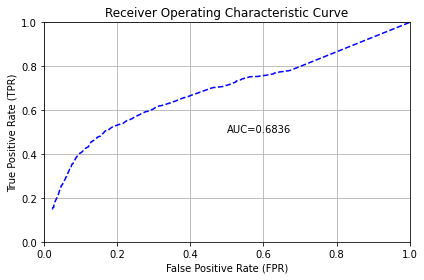

([0.022359419322542966,
  0.0225262806607709,
  0.0227765726681128,
  0.0227765726681128,
  0.023026864675454697,
  0.023110295344568665,
  0.023360587351910562,
  0.023944602035708328,
  0.024028032704822292,
  0.024194894043050225,
  0.026197230101785415,
  0.026364091440013348,
  0.026447522109127316,
  0.02653095277824128,
  0.02661438344735525,
  0.026697814116469213,
  0.027532120807608876,
  0.028032704822292673,
  0.028032704822292673,
  0.02811613549140664,
  0.028449858167862507,
  0.02903387285166027,
  0.02928416485900217,
  0.029451026197230102,
  0.03796095444685466,
  0.03796095444685466,
  0.03871183046888036,
  0.03896212247622226,
  0.04496913065242783,
  0.045302853328883695,
  0.046721174703821124,
  0.046721174703821124,
  0.046721174703821124,
  0.046721174703821124,
  0.04697146671116302,
  0.047305189387618886,
  0.04772234273318872,
  0.04905723343901218,
  0.049224094777240116,
  0.04947438678458201,
  0.05014183213749374,
  0.05039212414483564,
  0.0505589854

In [ ]:
# ROC
best_rf_perf1.plot(type='roc')

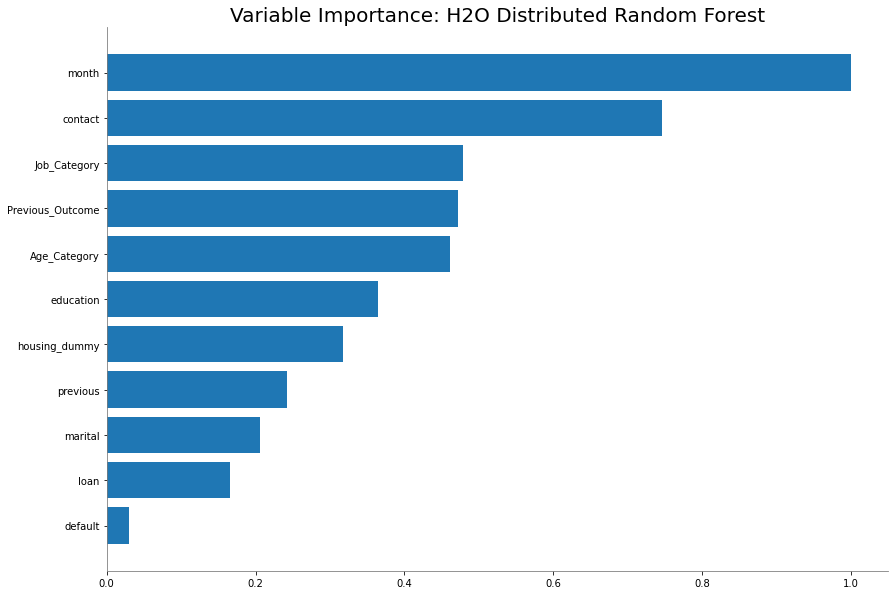

<Figure size 432x288 with 0 Axes>

In [ ]:
#Variable Importance
best_rf1.varimp_plot(num_of_features=13)

Prepare Logistic Regression

In [ ]:
#Training Logistic Regression Model
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch

glm_grid1 = H2OGridSearch(model=H2OGeneralizedLinearEstimator,
                          grid_id='glm_grid1',
                          hyper_params=hyper_params_glm,
                          search_criteria=search_criteria
                         )
glm_grid1.train(x=x, y=y,
                training_frame=trn_h,
                stopping_metric = "misclassification", stopping_tolerance = 1e-3, 
							  stopping_rounds = 3,
							  nfolds = 5, fold_assignment = "Modulo", 
                balance_classes = True,
							  keep_cross_validation_predictions = True,
                standardize = True,                   
                family = "binomial",
                lambda_search=False,
                seed=1
               )
#The grid results, sorted by validation error
glm_gridperf1 = glm_grid1.get_grid(sort_by='err', decreasing=True)

#Grabbing the top GLM model, chosen by validation error
best_glm1 = glm_gridperf1.models[0]

glm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.7/dist-packages/h2o/job.py:83: UserWarning: Reached maximum number of iterations 50!
  warnings.warn(w)
/usr/local/lib/python3.7/dist-packages/h2o/grid/grid_search.py:427: UserWarning: Adding alpha array to hyperparameter runs slower with gridsearch. This is due to the fact that the algo has to run initialization for every alpha value. Setting the alpha array as a model parameter will skip the initialization and run faster overall.
  warnings.warn(w_message)


In [ ]:
#Evaluating
glm_gridperf1 = glm_grid1.get_grid(sort_by='err', decreasing=True)
best_glm1 = glm_gridperf1.models[0]

In [ ]:
# AUC
best_glm_perf1 = best_glm1.model_performance(tst_h)
best_glm_perf1.auc()

0.7056668958539616

In [ ]:
# Confusion Matrix
best_glm_perf1


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.0958367763312501
RMSE: 0.3095751545768008
LogLoss: 0.3311717398561099
Null degrees of freedom: 13561
Residual degrees of freedom: 13550
Null deviance: 9745.792892034944
Residual deviance: 8982.702271857128
AIC: 9006.702271857128
AUC: 0.7056668958539616
AUCPR: 0.2598406489389274
Gini: 0.41133379170792317

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.19675438993950284: 


,,0,1,Error,Rate
0,0,10411.0,1575.0,0.1314,(1575.0/11986.0)
1,1,962.0,614.0,0.6104,(962.0/1576.0)
2,Total,11373.0,2189.0,0.1871,(2537.0/13562.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.196754,0.326162,164.0
1,max f2,0.118886,0.451464,252.0
2,max f0point5,0.266530,0.327869,105.0
3,max accuracy,0.815749,0.883719,0.0
4,max precision,0.349344,0.456311,59.0
5,max recall,0.012764,1.000000,397.0
6,max specificity,0.815749,0.999917,0.0
7,max absolute_mcc,0.196754,0.224903,164.0
8,max min_per_class_accuracy,0.125534,0.648757,243.0
9,max mean_per_class_accuracy,0.146640,0.652490,218.0



Gains/Lift Table: Avg response rate: 11.62 %, avg score: 11.80 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010028,0.377542,3.796469,3.796469,0.441176,0.443081,0.441176,0.443081,0.038071,0.038071,279.646910,279.646910,0.031730
1,2,0.020056,0.329940,3.606646,3.701557,0.419118,0.350169,0.430147,0.396625,0.036168,0.074239,260.664564,270.155737,0.061307
2,3,0.030084,0.305507,3.606646,3.669920,0.419118,0.315899,0.426471,0.369717,0.036168,0.110406,260.664564,266.992013,0.090883
3,4,0.040038,0.285632,3.442132,3.613288,0.400000,0.294017,0.419890,0.350896,0.034264,0.144670,244.213198,261.328771,0.118389
4,5,0.050214,0.272383,2.930801,3.474986,0.340580,0.278718,0.403818,0.336270,0.029822,0.174492,193.080078,247.498640,0.140620
5,6,0.100059,0.228543,2.176792,2.828281,0.252959,0.247834,0.328666,0.292215,0.108503,0.282995,117.679204,182.828088,0.206990
6,7,0.151379,0.201636,1.681501,2.439504,0.195402,0.214188,0.283488,0.265762,0.086294,0.369289,68.150125,143.950416,0.246563
7,8,0.200044,0.182330,1.460298,2.201290,0.169697,0.191068,0.255805,0.247591,0.071066,0.440355,46.029842,120.128971,0.271909
8,9,0.300103,0.149408,1.287312,1.896556,0.149595,0.164555,0.220393,0.219906,0.128807,0.569162,28.731170,89.655552,0.304437
9,10,0.400310,0.122885,0.975144,1.665906,0.113319,0.135811,0.193590,0.198855,0.097716,0.666878,-2.485591,66.590565,0.301619


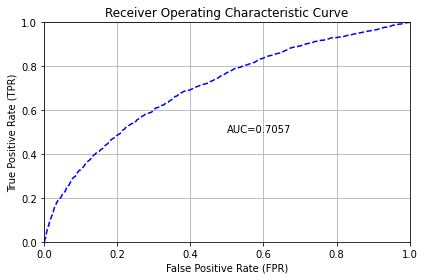

([8.34306691139663e-05,
  0.0001668613382279326,
  0.0002502920073418989,
  0.00041715334556983145,
  0.0005005840146837978,
  0.0005840146837977641,
  0.0007508760220256966,
  0.0007508760220256966,
  0.0008343066911396629,
  0.0009177373602536292,
  0.0009177373602536292,
  0.0009177373602536292,
  0.0010011680293675956,
  0.0010845986984815619,
  0.0011680293675955281,
  0.0011680293675955281,
  0.0013348907058234607,
  0.001418321374937427,
  0.0015017520440513933,
  0.0015851827131653595,
  0.0015851827131653595,
  0.0016686133822793258,
  0.0018354747205072584,
  0.002002336058735191,
  0.0020857667278491574,
  0.00225262806607709,
  0.002502920073418989,
  0.002502920073418989,
  0.0027532120807608877,
  0.0027532120807608877,
  0.0030035040881027865,
  0.003086934757216753,
  0.0033372267645586516,
  0.003754380110128483,
  0.003921241448356416,
  0.004088102786584349,
  0.004421825463040214,
  0.0046721174703821125,
  0.004755548139496079,
  0.004755548139496079,
  0.005089270

In [ ]:
# ROC
best_glm_perf1.plot(type='roc')

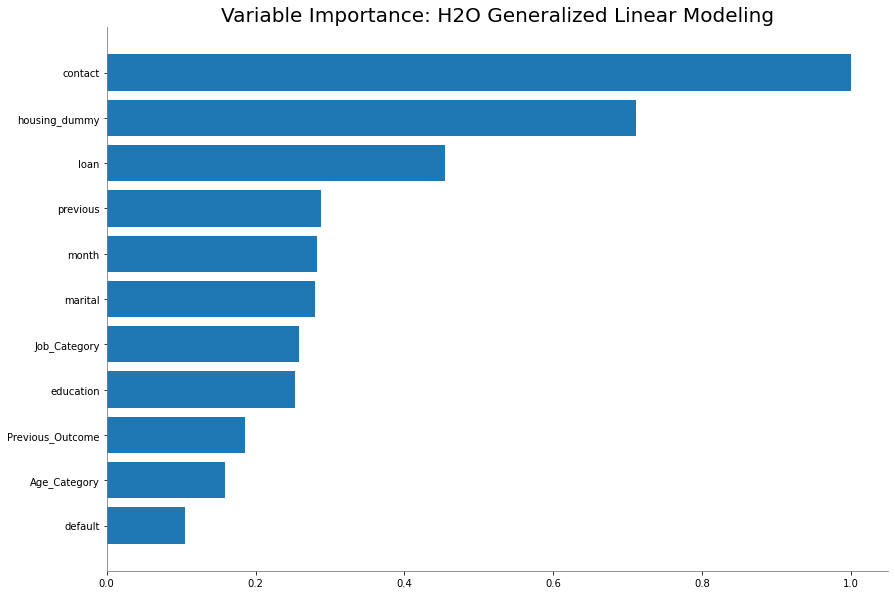

<Figure size 432x288 with 0 Axes>

In [ ]:
# Variable Importance
best_glm1.varimp_plot(num_of_features=13)

1. Which features are NOT important in the model? Why do you think that is?

**Answer**: The feature that is the least important is default as it scored the lowest in variable importance for both the random forest model and the logistic regression model. For my random forest model, the least important features are default, loan, and martial. For my logistic regression model, the least important features are default, Age Category, and Previous Outcome. I believe that default is not an important feature in the model because there is a disproportionate amount of no values compared to yes values as well as the fact that if someone has or does not have credit in default most likely would not impact if they respond postively to the marketing campaign. 

2. Were any of the features you developed important in either model? 

**Answer:** Yes. For my random forest model, both Job Category and Previous Outcome proved to be important as illustrated by the Variable Importance bar graph. For my logistic regression model, Housing Dummy, and Job Category proved to be important as they ranked the highest for variable importance in the logistic regression model out of all of the features that I built. 

3. Why do you think they were (or where not)?

**Answer:** I believe that the job category and age category features are important as they group together similar job types and create age ranges. This makes it easier to identify the relationship between people with similar jobs and the y1 variable as well as people with different ages and the y1 variable. Additionally, I found that there are some job categories and age categories that are more likely to respond postively to the marketing campaign than others from the graphs I created in Homework 1. Therefore, I believe that job categories and age categories are relevant and useful in my models. 

4. Did the importance change between the modeling algorithms? 
**Answer:** Yes, the importance did change between the modeling algorithms. For my random forest model, the variables with the highest importance are month, contact, and Previous Outcome and the variables with the lowest importance are default, loan, and martial. On the other hand, for my logistic regression model, the variables with the highest importance are contact, housing dummy, and loan whereas the variables with the lowest importance are default, Age Category, and Previous Outcome. 

5. Calculate the overall Accuracy of each model?
**Answer** The overall accuracy for my random forest model is 0.84, based on the confusion matrix. For my logistic regression model, the accuracy is  0.81, based on the confusion matrix. Additionally, the AUC for the random forest model is 0.69 whereas the AUC for the logistic regression model is 0.71. 

6. Do you think your model has a reliable prediction? Why or Why Not?

**Answer** Yes, I think that my models have a reliable prediction based on my assessment of the accuracy of both models as well as the AUCs. 

7. Which model would you choose and why?
**Answer:** The model I would choose is the logistic regression model as my logistic regression model has a higher AUC at 0.71 than the random forest model which has an AUC of 0.69. I'm choosing the model with the highest AUC as AUC is a single measure that is helpful in determining a model's predictive performance. Additionally, the logistic regression model has a farily high accuracy score of 0.81 based on the number of true positives, true negatives, false positives, and false negatives in the confusion matrix. 

In [2]:
#h2o.shutdown()